<a href="https://colab.research.google.com/github/MohHaroon/Adult-Census-Income-Classification/blob/main/hcho_monitoring_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [47]:
!pip install pyspark

In [48]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *


##Initialize Spark session


In [49]:
spark = SparkSession.builder.appName("HCHO_analysis").getOrCreate()

#Load data into the dataset

In [50]:
col_mat_nuw_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/col_mat_nuw_output.csv", inferSchema = True)
mon_kur_jaf_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/mon_kur_jaf_output.csv", inferSchema = True)
kan_output = spark.read.csv("/content/drive/MyDrive/CM2606 CW/kan_output.csv", inferSchema = True)

#Exploratary data analysis

In [51]:
col_mat_nuw_output.show()
mon_kur_jaf_output.show()
kan_output.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [52]:
col_mat_nuw_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [53]:
mon_kur_jaf_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [54]:
kan_output.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [55]:
col_mat_nuw_output.count()

5478

In [56]:
mon_kur_jaf_output.count()

5478

In [57]:
kan_output.count()

1826

In [58]:
sl_data = col_mat_nuw_output.union(mon_kur_jaf_output).union(kan_output)

In [59]:
sl_data.count()

12782

In [60]:
sl_data = sl_data.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location").withColumnRenamed("_c2", "Current_Date").withColumnRenamed("_c3", "Next_Date")

In [61]:
sl_data.show()

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_Date| Next_Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [62]:
sl_data.groupBy("Location").count().show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
|       Kandy Proper| 1826|
+-------------------+-----+



In [63]:
sl_data.groupBy("Current_Date").count().orderBy("count", ascending=False).show()
sl_data.groupBy("Next_Date").count().orderBy("count", ascending=False).show()

+------------+-----+
|Current_Date|count|
+------------+-----+
|  2019-05-08|    7|
|  2019-06-04|    7|
|  2020-08-24|    7|
|  2021-01-27|    7|
|  2021-06-22|    7|
|  2021-08-27|    7|
|  2021-10-11|    7|
|  2021-11-13|    7|
|  2021-12-18|    7|
|  2022-03-28|    7|
|  2022-07-31|    7|
|  2023-06-22|    7|
|  2023-07-15|    7|
|  2019-09-22|    7|
|  2019-11-01|    7|
|  2019-11-18|    7|
|  2020-01-21|    7|
|  2020-07-24|    7|
|  2020-08-05|    7|
|  2020-11-29|    7|
+------------+-----+
only showing top 20 rows

+----------+-----+
| Next_Date|count|
+----------+-----+
|2019-05-08|    7|
|2019-06-04|    7|
|2020-08-24|    7|
|2021-01-27|    7|
|2021-06-22|    7|
|2021-08-27|    7|
|2021-10-11|    7|
|2021-11-13|    7|
|2021-12-18|    7|
|2022-03-28|    7|
|2022-07-31|    7|
|2023-06-22|    7|
|2023-07-15|    7|
|2019-09-22|    7|
|2019-11-01|    7|
|2019-11-18|    7|
|2020-01-21|    7|
|2020-07-24|    7|
|2020-08-05|    7|
|2020-11-29|    7|
+----------+-----+
only showing t

In [64]:
sl_data.groupBy("HCHO_reading").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|        HCHO_reading|count|
+--------------------+-----+
|                NULL| 4864|
|8.925810029372805E-5|    1|
|1.485055886232474...|    1|
|1.144656784438417...|    1|
|1.624422749850199...|    1|
|1.843671941389100...|    1|
|2.289257347507758E-4|    1|
|1.568694436659797...|    1|
|2.955471068557156E-4|    1|
|7.345198097368317E-5|    1|
|1.158354593824839...|    1|
|7.002533500214887E-5|    1|
|4.072215805419399...|    1|
|7.456395320699945E-5|    1|
|3.090292903243917E-5|    1|
|1.622308343621376...|    1|
|2.984725432944723E-4|    1|
|1.076937462352484...|    1|
|1.102070148058524...|    1|
|1.614190987342073E-4|    1|
+--------------------+-----+
only showing top 20 rows



In [65]:
# Filter rows where Hcho reading is null
null_hcho_count = sl_data.filter(col("HCHO_reading").isNull()).groupBy("Location").count()

null_hcho_count.show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara|  847|
|     Colombo Proper|  487|
|Nuwara Eliya Proper| 1085|
|  Kurunegala Proper|  592|
| Bibile, Monaragala|  695|
|      Jaffna Proper|  365|
|       Kandy Proper|  793|
+-------------------+-----+



In [66]:
invalid_dates = sl_data.filter(col("Current_date").isNull() & col("Next_date").isNull())
invalid_dates.show()

+------------+--------+------------+---------+
|HCHO_reading|Location|Current_Date|Next_Date|
+------------+--------+------------+---------+
+------------+--------+------------+---------+



In [67]:
print("The number of null values in location column, ", sl_data.filter(col("Location").isNull()).count())

The number of null values in location column,  0


In [68]:
sl_data.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)



#Data Pre-processing

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Fill null values

In [70]:
hcho_reading_fill = sl_data.toPandas()
hcho_reading_filled = hcho_reading_fill.interpolate(method="linear")
sl_data = spark.createDataFrame(pd.DataFrame(hcho_reading_filled))

sl_data.groupBy("HCHO_reading").count().orderBy("count", ascending=False).show()
sl_data.show()

+--------------------+-----+
|        HCHO_reading|count|
+--------------------+-----+
|5.590120257397272E-5|    2|
|2.235211819832074E-5|    1|
|8.925810029372805E-5|    1|
|1.485055886232474...|    1|
|1.144656784438417...|    1|
|3.053348180253346...|    1|
|1.624422749850199...|    1|
|1.843671941389100...|    1|
|2.289257347507758E-4|    1|
|9.467302202011916E-5|    1|
|1.568694436659797...|    1|
|2.955471068557156E-4|    1|
|6.491930822965615E-5|    1|
|7.345198097368317E-5|    1|
|1.167452603458876...|    1|
|1.158354593824839...|    1|
|-1.77529565191807...|    1|
|7.002533500214887E-5|    1|
|1.615022950584113E-4|    1|
|8.031240614841725E-5|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_Date| Next_Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo 

##Detect and handle outliers

In [71]:
def detect_outliers_iqr(dataframe, column, factor = 1.4):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    quantiles = dataframe.approxQuantile(column, [0.25, 0.75], 0.01)
    Q1 = quantiles[0]
    Q3 = quantiles[1]

    # Interquartile Range (IQR)
    IQR = Q3 - Q1

    lowerbound = Q1 - factor * IQR
    upperbound = Q3 + factor * IQR

    # Determine outliers
    outliers = dataframe.filter((col(column) < lowerbound) | (col(column) > upperbound))

    return outliers

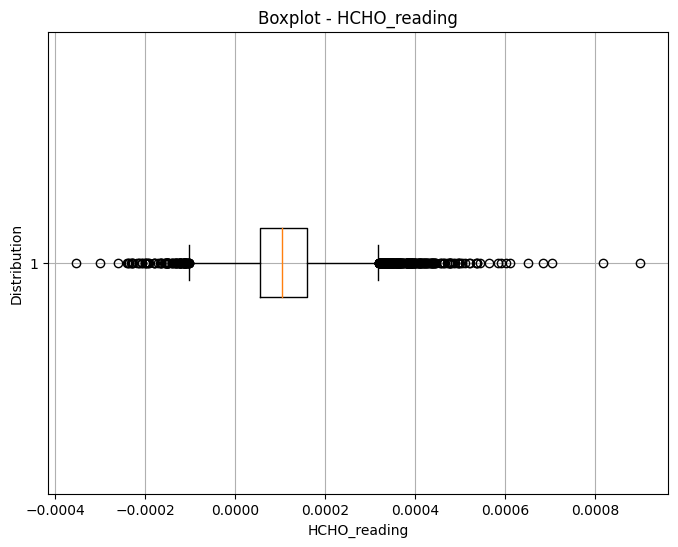

In [72]:
hcho_reading = sl_data.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading["HCHO_reading"], vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [73]:
# Detect outliers in the HCHO readings column
outliers_hcho = detect_outliers_iqr(sl_data, 'HCHO_reading')
print("The number of outliers in HCHO reading column :", outliers_hcho.count())
print("The number of rows in the dataframe :", sl_data.count())

The number of outliers in HCHO reading column : 431
The number of rows in the dataframe : 12782


In [74]:
sl_data = sl_data.subtract(outliers_hcho)
print("The number of rows in the dataframe :", sl_data.count())

The number of rows in the dataframe : 12351


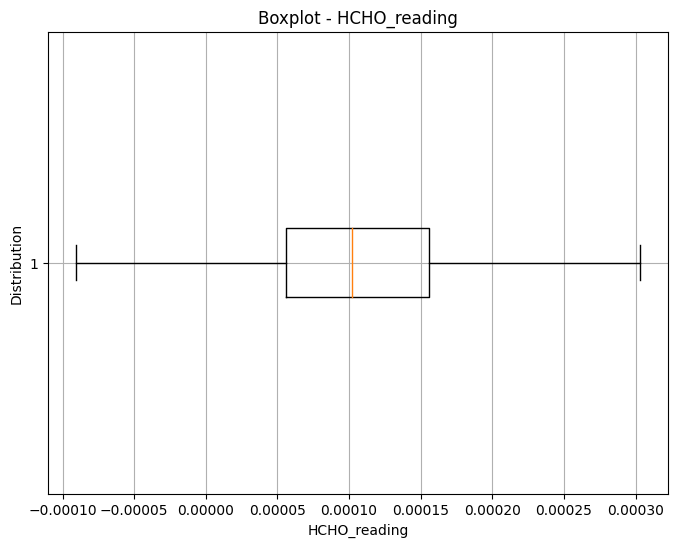

In [75]:
hcho_reading_data = sl_data.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading_data.HCHO_reading, vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

##Summarize dataset

In [76]:
#summary_df = sl_data.select
sl_data.groupBy('Location').agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+-------------------+--------------------+--------------------+--------------------+
|           Location|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+-------------------+--------------------+--------------------+--------------------+
|       Kandy Proper|9.864350993400207E-5|9.544988197364665E-5|7.337368793748523E-5|
|   Deniyaya, Matara| 8.73963238364968E-5|8.073384512511853E-5|7.101688330282398E-5|
|  Kurunegala Proper|1.196647759697169...|1.131715883095128...|7.202016614259914E-5|
| Bibile, Monaragala|1.154192293799778...|1.147729833832740...|7.557023478754478E-5|
|     Colombo Proper|1.406286515999640...|1.370929537762054...| 7.61778963200738E-5|
|Nuwara Eliya Proper|8.215463186454978E-5|7.614431953481086E-5|6.914954177956821E-5|
|      Jaffna Proper|1.035889472938797...|9.853363920911935E-5|6.290372462092302E-5|
+-------------------+--------------------+--------------------+--------------------+



In [77]:
sl_data.agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+--------------------+--------------------+--------------------+
|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+--------------------+--------------------+--------------------+
|1.065202299729504...|1.018427415577984...|7.389404558971392E-5|
+--------------------+--------------------+--------------------+



## Boxplots & Histograms

In [78]:
pd_sl_data = sl_data.toPandas()

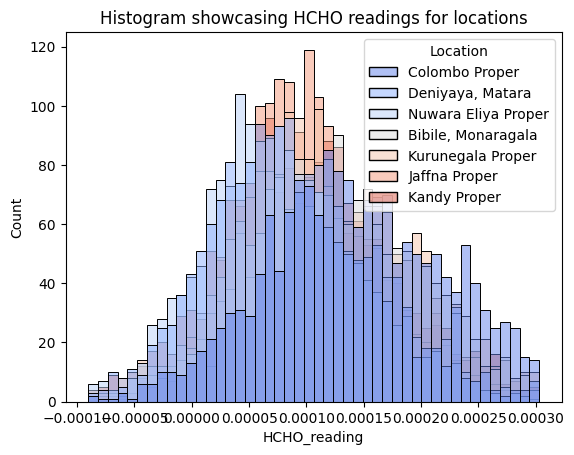

In [79]:
sns.histplot(x='HCHO_reading', palette='coolwarm', hue='Location', data=pd_sl_data)
plt.title("Histogram showcasing HCHO readings for locations")
plt.show()

<ipython-input-80-3d514ab50425>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HCHO_reading', palette='coolwarm', y='Location', data=pd_sl_data)


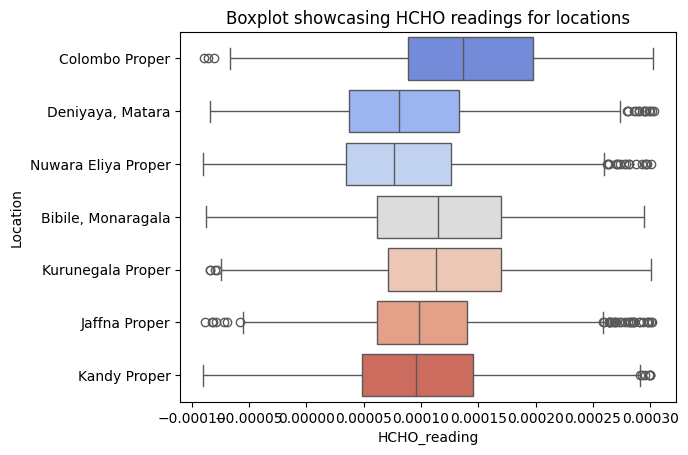

In [80]:
sns.boxplot(x='HCHO_reading', palette='coolwarm', y='Location', data=pd_sl_data)
plt.title("Boxplot showcasing HCHO readings for locations")
plt.show()

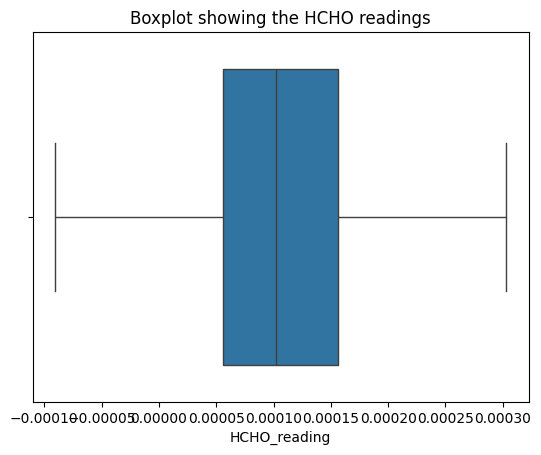

In [81]:
sns.boxplot(x='HCHO_reading', data=pd_sl_data)
plt.title('Boxplot showing the HCHO readings')
plt.show()

#Spatio-Temporal Analysis

##Analysis of trends over time

In [104]:
hcho_data = sl_data.toPandas()

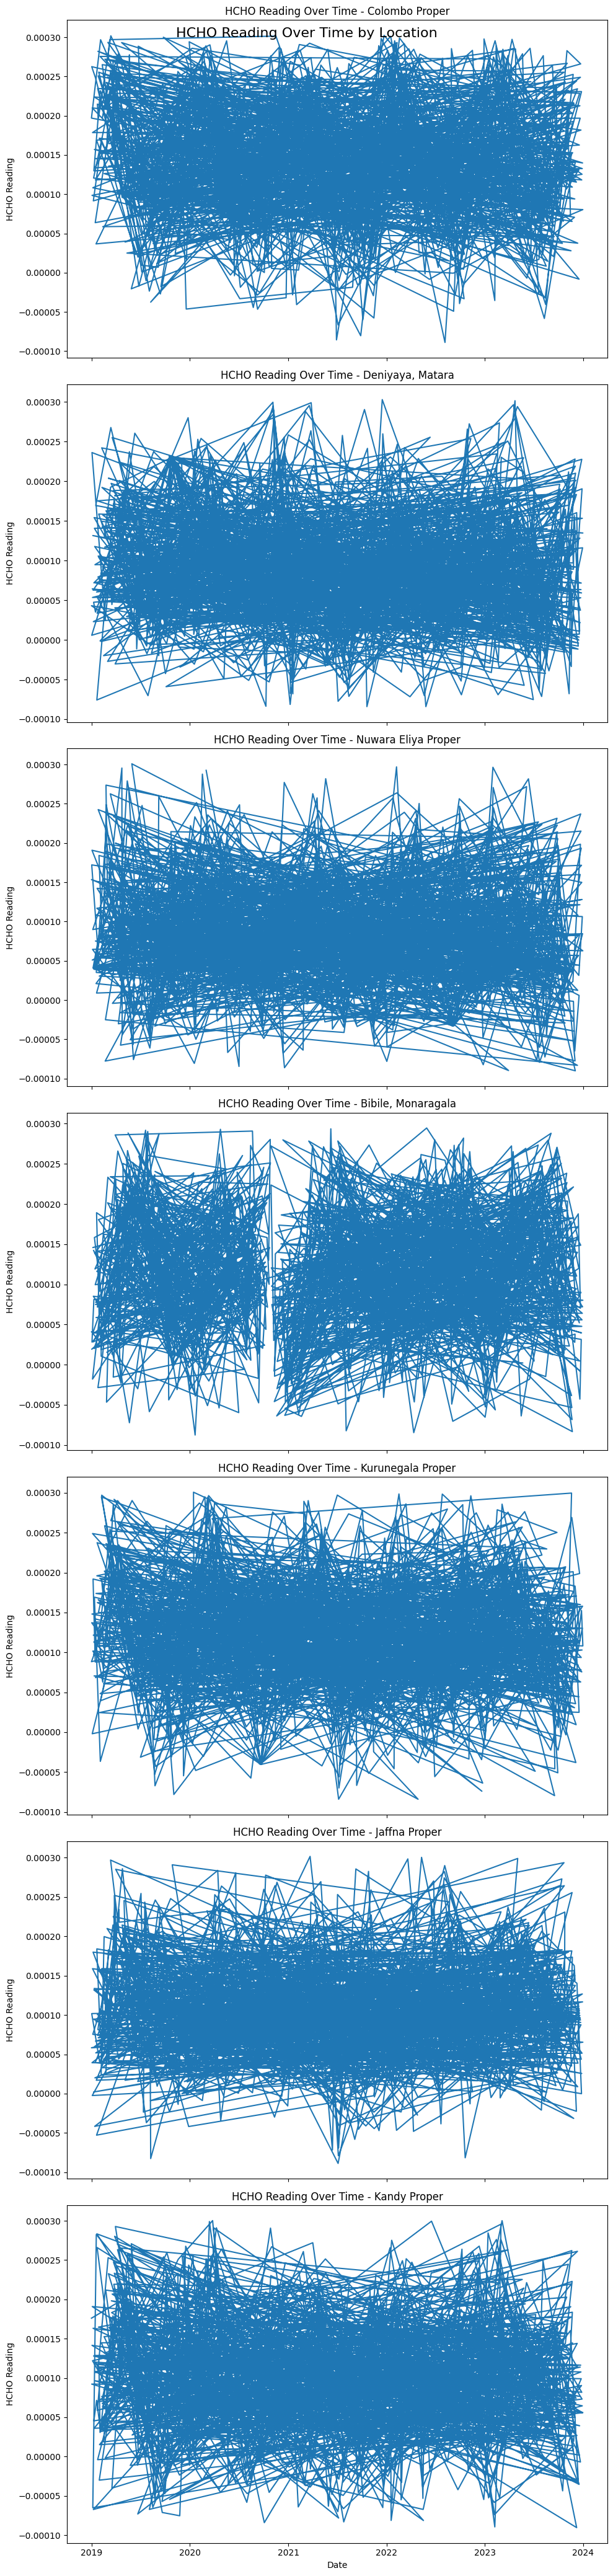

In [119]:
import matplotlib.pyplot as plt

# Assuming 'location', 'date', and 'hcho_reading' are columns in your DataFrame

# Get unique locations
locations = hcho_data['Location'].unique()

# Create subplots for each location
fig, axs = plt.subplots(len(locations), 1, figsize=(10, 6 * len(locations)), sharex=True)

# Plotting line graph for each location
for i, location in enumerate(locations):
    data = hcho_data[hcho_data['Location'] == location]
    axs[i].plot(data['Current_Date'], data['HCHO_reading'])
    axs[i].set_ylabel('HCHO Reading')
    axs[i].set_title(f'HCHO Reading Over Time - {location}')

# Set common x-label
fig.suptitle('HCHO Reading Over Time by Location', fontsize=16)
plt.xlabel('Date')

plt.tight_layout()
plt.show()


In [88]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.stats.diagnostic import acorr_ljungbox

# # Assuming hcho_data is your DataFrame with a datetime index and 'Location' column

# # Get unique locations
# locations = hcho_data['Location'].unique()

# # Iterate over each location
# for location in locations:

#     print("\new location")
#     # Filter data for the current location
#     location_data = hcho_data[hcho_data['Location'] == location]

#     # Plot the time series data for the current location
#     plt.figure(figsize=(10, 6))
#     plt.plot(location_data.index, location_data['HCHO_reading'])
#     plt.title(f'HCHO Levels Over Time - {location}')
#     plt.xlabel('Date')
#     plt.ylabel('HCHO Level')
#     plt.show()

#     # Perform ACF and PACF analysis for the current location
#     plot_acf(location_data['HCHO_reading'], lags=30)
#     plot_pacf(location_data['HCHO_reading'], lags=30)
#     plt.title(f'ACF and PACF - {location}')
#     plt.show()

#     # Fit an ARIMA model for the current location
#     model = ARIMA(location_data['HCHO_reading'], order=(1, 0, 1))
#     fit_model = model.fit()

#     # Display model summary
#     print(fit_model.summary())

#     # Check residuals for autocorrelation for the current location
#     residuals = fit_model.resid
#     plt.figure(figsize=(10, 4))
#     plt.plot(residuals)
#     plt.title(f'Residuals of ARIMA Model - {location}')
#     plt.xlabel('Date')
#     plt.ylabel('Residual')
#     plt.show()

#     # Perform Ljung-Box test for residual autocorrelation for the current location
#     lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=20)
#     print(f"Ljung-Box Test Statistic - {location}:", lb_test_stat)
#     print(f"P-value - {location}:", lb_p_value)


In [89]:
!pip install pmdarima

##One hot encoding

In [90]:
# from pyspark.ml.feature import OneHotEncoder

# # Assuming df is your DataFrame containing categorical columns

# # Identify categorical columns
# categorical_columns = [col_name for col_name, data_type in sl_data.dtypes if data_type == "string"]

# # Specify input and output columns for OneHotEncoder
# input_cols = [col_name + "_index" for col_name in categorical_columns]
# output_cols = [col_name + "_encoded" for col_name in categorical_columns]

# # Initialize OneHotEncoder
# encoder = OneHotEncoder(inputCols=input_cols, outputCols=output_cols)

# # Fit OneHotEncoder on DataFrame
# model = encoder.fit(sl_data)

# # Transform DataFrame to apply one-hot encoding
# encoded = model.transform(sl_data)

# # Show the transformed DataFrame
# encoded.show()


In [91]:
# from sklearn.preprocessing import OneHotEncoder

# sl_data_pd = sl_data.toPandas()

# #Extract categorical columns from the dataframe
# #Here we extract the columns with object datatype as they are the categorical columns
# categorical_columns = sl_data_pd.select_dtypes(include=['object']).columns.tolist()

# #Initialize OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# # Apply one-hot encoding to the categorical columns
# one_hot_encoded = encoder.fit_transform(sl_data_pd[categorical_columns])

# #Create a DataFrame with the one-hot encoded columns
# #We use get_feature_names_out() to get the column names for the encoded data
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([sl_data_pd, one_hot_df], axis=1)

# # Drop the original categorical columns
# df_encoded = df_encoded.drop(categorical_columns, axis=1)

## Add external factors to the dataframe

In [94]:
from pyspark.sql import functions as F

In [95]:
sl_data = sl_data.withColumn(
    "Population_Density",
    F.when(col("Location").isin(["Colombo Proper", "Jaffna Proper", "Kandy Proper"]), "High")
    .when(col("Location").isin(["Nuwara Eliya Proper", "Kurunegala Proper"]), "Moderate")
    .when(col("Location").isin(["Deniyaya, Matara", "Bibile, Monaragala"]), "Moderate")
    .otherwise(None)
)

sl_data = sl_data.withColumn(
    "Elevation",
    F.when(col("Location").isin(["Colombo Proper", "Jaffna Proper", "Deniyaya, Matara"]), "Low")
    .when(col("Location").isin(["Nuwara Eliya Proper", "Kurunegala Proper", "Kandy Proper", "Bibile, Monaragala"]), "High")
    .otherwise(None)
)

In [96]:
sl_data.show()

+--------------------+-------------------+------------+----------+------------------+---------+
|        HCHO_reading|           Location|Current_Date| Next_Date|Population_Density|Elevation|
+--------------------+-------------------+------------+----------+------------------+---------+
|1.981789630254356E-4|     Colombo Proper|  2019-02-11|2019-02-12|              High|      Low|
|2.548286008604607E-4|     Colombo Proper|  2019-03-13|2019-03-14|              High|      Low|
|1.399382956399640...|     Colombo Proper|  2019-04-24|2019-04-25|              High|      Low|
|1.967218725518155...|     Colombo Proper|  2020-07-23|2020-07-24|              High|      Low|
| 1.58109816407928E-4|     Colombo Proper|  2020-08-29|2020-08-30|              High|      Low|
|8.078253427334957E-5|     Colombo Proper|  2021-06-25|2021-06-26|              High|      Low|
|1.009215347501832...|     Colombo Proper|  2021-10-01|2021-10-02|              High|      Low|
|1.679734273305888...|     Colombo Prope

In [102]:
# Convert label (string) to integer for classification
# from pyspark.ml.feature import StringIndexer
# labelIndexer = StringIndexer(inputCols=["HCHO_reading"], outputCol="label").fit(sl_data)
# df = labelIndexer.transform(sl_data)
# df.show()


# Assemble features into a single vector
# from pyspark.ml.feature import VectorAssembler
# assembler = VectorAssembler(inputCols=["HCHO_reading", "Next_Date", "Current_Date", "Population_Density","Elevation"], outputCol="features")
# spark_df = assembler.transform(sl_data)

# spark_df = spark_df.withColumnRenamed("y", "label")

# spark_df.show()

IllegalArgumentException: StringIndexer StringIndexer_83b4d3fbf959 has the inputCols Param set for multi-column transform. The following Params are not applicable and should not be set: outputCol.The following Params must be defined but are not set: outputCols.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pmdarima as pm

# Assuming hcho_data is your DataFrame or array containing the HCHO levels

# Split data into train and test sets
train_size = 100
train, test = train_test_split(hcho_data, train_size=train_size, shuffle=False)

# Fit model using auto_arima
model = pm.auto_arima(train, seasonal=True, m=12)

# Generate forecasts
forecasts = model.predict(test.shape[0])

# Plot expected vs predicted values
x = np.arange(len(hcho_data))
plt.plot(x, hcho_data, c='blue', label='Expected')
plt.plot(x[train_size:], forecasts, c='green', label='Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Level')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()


ValueError: could not convert string to float: 'Colombo Proper'

##Standardization

In [ ]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'HCHO_reading','Current_date','Next_date'
], outputCol='features')

assembled_data=assemble.transform(sl_data_pd)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

##Compare spatial patterns

#Machine Learning model